In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

In [3]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [4]:
df = pd.read_csv(url, names=column_names, na_values='?')

In [5]:
print(f"   Rows: {df.shape[0]}, Columns: {df.shape[1]}")

   Rows: 303, Columns: 14


In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [9]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [10]:
df['target'].value_counts()

,count
target,
0,164
1,55
2,36
3,35
4,13


In [11]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

In [12]:
print("\n7. Binary Target Distribution:")
print(f"   No Disease (0): {(df['target']==0).sum()}")
print(f"   Disease (1): {(df['target']==1).sum()}")


7. Binary Target Distribution:
   No Disease (0): 164
   Disease (1): 139


In [13]:
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Rows with missing values: {df.isnull().any(axis=1).sum()}")


ca      4
thal    2
dtype: int64

Total missing values: 6
Rows with missing values: 6


In [14]:
from sklearn.impute import SimpleImputer

# Separate features and target
X_raw = df.drop('target', axis=1)
y = df['target'].values

# Impute missing values with median (better than dropping rows)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_raw)

In [15]:
df_clean = pd.DataFrame(X_imputed, columns=X_raw.columns)
df_clean['target'] = y

print(f"\n✓ Missing values imputed using median strategy")
print(f"  Original shape: {df.shape}")
print(f"  After imputation: {df_clean.shape}")
print(f"  Remaining NaN: {df_clean.isnull().sum().sum()}")


✓ Missing values imputed using median strategy
  Original shape: (303, 14)
  After imputation: (303, 14)
  Remaining NaN: 0


In [16]:
print("\n[2.2] Feature Engineering...")

# Create a copy for feature engineering
df_processed = df_clean.copy()


[2.2] Feature Engineering...


In [17]:
df_processed = df_clean.copy()

# Derived feature: Heart Rate Reserve (single calculation, with NaN-safe handling)
predicted_max_hr = 220 - df_processed['age']
df_processed['hr_reserve'] = df_processed['thalach'] - (predicted_max_hr * 0.5)
# If any NaN appear (shouldn't normally), fill with median
if df_processed['hr_reserve'].isnull().any():
    df_processed['hr_reserve'].fillna(df_processed['hr_reserve'].median(), inplace=True)

In [18]:
df_processed['bp_category'] = pd.cut(df_processed['trestbps'],
                                      bins=[0, 120, 130, 200],
                                      labels=['normal', 'elevated', 'high'])

In [19]:
df_processed['chol_category'] = pd.cut(df_processed['chol'],
                                        bins=[0, 200, 240, 600],
                                        labels=['normal', 'borderline', 'high'])

In [20]:
predicted_max_hr = 220 - df_processed['age']
df_processed['hr_reserve'] = df_processed['thalach'] - (predicted_max_hr * 0.5)

In [21]:
cp_severity = {1: 0, 2: 1, 3: 2, 4: 3}
df_processed['cp_severity'] = df_processed['cp'].map(cp_severity)

In [22]:
if df_processed['cp_severity'].isnull().any():
    # Fallback: fill missing with median of existing cp_severity
    df_processed['cp_severity'].fillna(int(df_processed['cp_severity'].median()), inplace=True)
df_processed['cp_severity'] = df_processed['cp_severity'].astype(int)

In [23]:
df_processed['age_group'] = pd.cut(df_processed['age'], bins=[20,40,60,80], labels=['young','middle','old'])


In [24]:
print("New derived features created:")
print("  - age_group: Categorical age ranges")
print("  - bp_category: Blood pressure risk level")
print("  - chol_category: Cholesterol risk level")
print("  - hr_reserve: Heart rate reserve capacity")
print("  - cp_severity: Chest pain severity score")


New derived features created:
  - age_group: Categorical age ranges
  - bp_category: Blood pressure risk level
  - chol_category: Cholesterol risk level
  - hr_reserve: Heart rate reserve capacity
  - cp_severity: Chest pain severity score


In [25]:
print("\n[2.3] Preparing Feature Sets...")

# Features for Neural Network (all numerical)
nn_features = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
               'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal',
               'hr_reserve', 'cp_severity']


[2.3] Preparing Feature Sets...


In [26]:
fuzzy_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [27]:
print(f"\nNeural Network will use {len(nn_features)} features:")
print(f"  {nn_features}")

print(f"\nFuzzy Logic will use {len(fuzzy_features)} key features:")
print(f"  {fuzzy_features}")



Neural Network will use 15 features:
  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hr_reserve', 'cp_severity']

Fuzzy Logic will use 5 key features:
  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [28]:
print("\n[2.4] Splitting Data into Train/Test Sets...")

# Prepare X and y
X = df_processed[nn_features].values
y = df_processed['target'].values


[2.4] Splitting Data into Train/Test Sets...


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [30]:
print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"\nClass distribution in training set:")
print(f"  No Disease (0): {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"  Disease (1): {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")


Training set: 242 samples
Test set: 61 samples

Class distribution in training set:
  No Disease (0): 131 (54.1%)
  Disease (1): 111 (45.9%)


In [31]:
print("\n[2.5] Feature Scaling...")

# Initialize scaler
scaler = StandardScaler()



[2.5] Feature Scaling...


In [32]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
# Define column names for UCI Heart Disease dataset
feature_names = [
' age', 'sex', 'cp', 'trestbps', 'chol',
'fbs', 'restecg', 'thalach', 'exang',
'oldpeak', 'slope', 'ca', 'thal', 'target'
]
# If 'target' was dropped already
X_columns = feature_names[:-1]


In [34]:
print("Features standardized using StandardScaler (mean=0, std=1)")
print(f"\nExample - Feature 0 (age):")
print(f"  Before scaling: mean={X_train[:, 0].mean():.2f}, std={X_train[:, 0].std():.2f}")
print(f"  After scaling: mean={X_train_scaled[:, 0].mean():.2f}, std={X_train_scaled[:, 0].std():.2f}")

Features standardized using StandardScaler (mean=0, std=1)

Example - Feature 0 (age):
  Before scaling: mean=54.55, std=8.98
  After scaling: mean=-0.00, std=1.00


In [35]:
X_train_cnn = X_train_scaled.reshape(-1, 15, 1)
X_test_cnn = X_test_scaled.reshape(-1, 15, 1)

In [36]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(15, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 13, 32)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 4, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,561 (41.25 KB)

 Trainable params: 10,561 (41.25 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
history = model.fit(X_train_cnn, y_train,
                    epochs=30,
                    batch_size=16,
                    validation_data=(X_test_cnn, y_test))

Epoch 1/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.5913 - auc: 0.5247 - loss: 0.6859 - val_accuracy: 0.7213 - val_auc: 0.8268 - val_loss: 0.6264
Epoch 2/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7377 - auc: 0.7904 - loss: 0.6274 - val_accuracy: 0.7377 - val_auc: 0.8393 - val_loss: 0.5778
Epoch 3/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7692 - auc: 0.8342 - loss: 0.5686 - val_accuracy: 0.7377 - val_auc: 0.8366 - val_loss: 0.5368
Epoch 4/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8139 - auc: 0.8294 - loss: 0.5316 - val_accuracy: 0.7377 - val_auc: 0.8442 - val_loss: 0.5139
Epoch 5/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7859 - auc: 0.8385 - loss: 0.5011 - val_accuracy: 0.7705 - val_auc: 0.8485 - val_loss: 0.4905
Epoch 6/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7326 - auc: 0.7847 - loss: 0.5529 - val_accuracy: 0.7705 - val_auc: 0.8631 - val_loss: 0.4940
Epoch 7/30
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/ste

In [38]:
results = model.evaluate(X_test_cnn, y_test)
print("Test Loss, Accuracy, AUC:", results)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8064 - auc: 0.8883 - loss: 0.4309
Test Loss, Accuracy, AUC: [0.4479219317436218, 0.8032786846160889, 0.875]


In [39]:
y_pred_proba = model.predict(X_test_cnn).flatten()

# Optional: create a DataFrame for clarity
import pandas as pd
fis_input = pd.DataFrame({
    'cnn_output': y_pred_proba,
    'chol': X_test[:, 3],      # cholesterol
    'thalach': X_test[:, 7],   # max heart rate achieved
    'true_label': y_test
})
fis_input.head()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


,cnn_output,chol,thalach,true_label
0,0.545062,138.0,182.0,0
1,0.277585,160.0,138.0,0
2,0.154797,130.0,149.0,0
3,0.031207,118.0,174.0,0
4,0.808058,150.0,165.0,0


In [40]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 42.1 MB/s eta 0:00:00


In [41]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Define fuzzy variables
cnn_output = ctrl.Antecedent(np.arange(0, 1.01, 0.01), 'cnn_output')
chol = ctrl.Antecedent(np.arange(100, 400, 1), 'chol')
thalach = ctrl.Antecedent(np.arange(70, 210, 1), 'thalach')
heart_risk = ctrl.Consequent(np.arange(0, 1.01, 0.01), 'heart_risk')

In [42]:
cnn_output['low'] = fuzz.trimf(cnn_output.universe, [0, 0, 0.5])
cnn_output['medium'] = fuzz.trimf(cnn_output.universe, [0.25, 0.5, 0.75])
cnn_output['high'] = fuzz.trimf(cnn_output.universe, [0.5, 1, 1])

chol['low'] = fuzz.trimf(chol.universe, [100, 150, 200])
chol['medium'] = fuzz.trimf(chol.universe, [180, 220, 260])
chol['high'] = fuzz.trimf(chol.universe, [240, 300, 400])

thalach['low'] = fuzz.trimf(thalach.universe, [70, 100, 130])
thalach['medium'] = fuzz.trimf(thalach.universe, [120, 150, 180])
thalach['high'] = fuzz.trimf(thalach.universe, [160, 190, 210])

heart_risk['low'] = fuzz.trimf(heart_risk.universe, [0, 0, 0.4])
heart_risk['medium'] = fuzz.trimf(heart_risk.universe, [0.3, 0.5, 0.7])
heart_risk['high'] = fuzz.trimf(heart_risk.universe, [0.6, 1, 1])

In [43]:
rule1 = ctrl.Rule(cnn_output['high'] & chol['high'] & thalach['low'], heart_risk['high'])
rule2 = ctrl.Rule(cnn_output['high'] & chol['medium'] & thalach['medium'], heart_risk['high'])
rule3 = ctrl.Rule(cnn_output['medium'] & chol['high'], heart_risk['high'])
rule4 = ctrl.Rule(cnn_output['medium'] & chol['medium'] & thalach['low'], heart_risk['medium'])
rule5 = ctrl.Rule(cnn_output['low'] & chol['low'] & thalach['high'], heart_risk['low'])
rule6 = ctrl.Rule(cnn_output['low'] & chol['medium'], heart_risk['medium'])
rule7 = ctrl.Rule(cnn_output['high'] & thalach['high'], heart_risk['medium'])

In [44]:
heart_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7])
heart_sim = ctrl.ControlSystemSimulation(heart_ctrl)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
CNN predicted probability: 0.545
Cholesterol: 271.0, Max HR (thalach): 182.0
Fuzzy heart risk (defuzzified output): 0.787


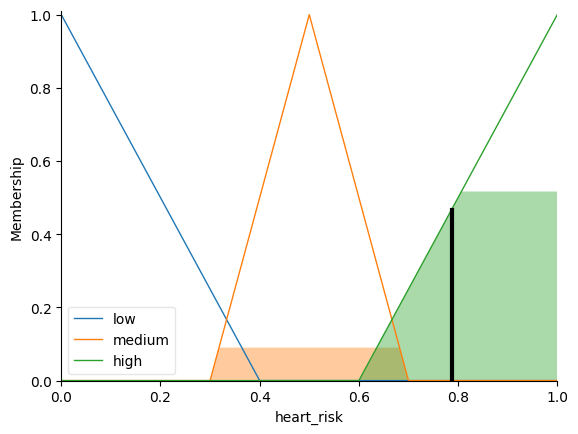

In [45]:
sample_idx = 0
sample_pred = model.predict(X_test_cnn[sample_idx].reshape(1, 15, 1))[0][0]

# Use column indices based on known UCI order
chol_index = X_columns.index('chol')
thalach_index = X_columns.index('thalach')

chol_val = X_test [sample_idx, chol_index]
thalach_val = X_test [sample_idx, thalach_index]

heart_sim.input['cnn_output'] = sample_pred
heart_sim.input['chol'] = chol_val
heart_sim.input['thalach'] = thalach_val

heart_sim.compute()

print(f"CNN predicted probability: {sample_pred:.3f}")
print(f"Cholesterol: {chol_val:.1f}, Max HR (thalach): {thalach_val:.1f}")
print(f"Fuzzy heart risk (defuzzified output): {heart_sim.output['heart_risk']:.3f}")

heart_risk.view(sim=heart_sim)

In [46]:
fuzzy_outputs = []
for i in range(len(X_test)):
    sample_pred = model.predict(X_test_cnn[i].reshape(1, 15, 1))[0][0]

    chol_val = X_test[i, chol_index]
    thalach_val = X_test[i, thalach_index]

    heart_sim.input['cnn_output'] = sample_pred
    heart_sim.input['chol'] = chol_val
    heart_sim.input['thalach'] = thalach_val

    try:
        heart_sim.compute()
        fuzzy_outputs.append(heart_sim.output['heart_risk'])
    except KeyError:
        fuzzy_outputs.append(sample_pred)
fuzzy_outputs = np.array(fuzzy_outputs)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━

In [47]:
fuzzy_preds = (fuzzy_outputs >= 0.5).astype(int)

In [48]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

acc = accuracy_score(y_test, fuzzy_preds)
auc = roc_auc_score(y_test, fuzzy_outputs)
cm = confusion_matrix(y_test, fuzzy_preds)

print("Hybrid CNN–FIS Model Evaluation:")
print(f"Accuracy: {acc:.3f}")
print(f"AUC: {auc:.3f}")
print("Confusion Matrix:\n", cm)

Hybrid CNN–FIS Model Evaluation:
Accuracy: 0.754
AUC: 0.889
Confusion Matrix:
 [[20 13]
 [ 2 26]]


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


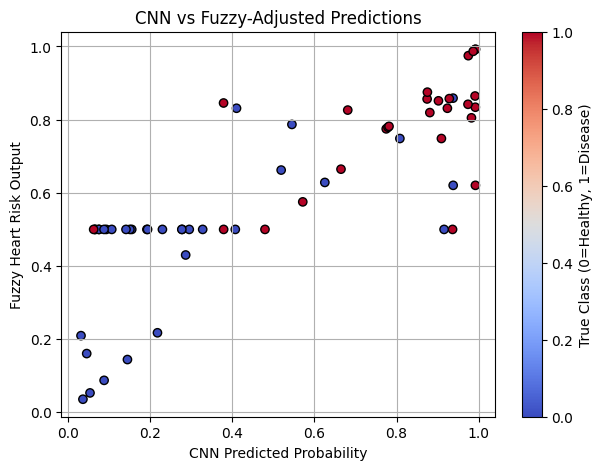

In [49]:
import matplotlib.pyplot as plt

# Compare CNN and Fuzzy outputs
cnn_outputs = model.predict(X_test_cnn).flatten()

plt.figure(figsize=(7,5))
plt.scatter(cnn_outputs, fuzzy_outputs, c=y_test, cmap='coolwarm', edgecolors='k')
plt.xlabel("CNN Predicted Probability")
plt.ylabel("Fuzzy Heart Risk Output")
plt.title("CNN vs Fuzzy-Adjusted Predictions")
plt.colorbar(label="True Class (0=Healthy, 1=Disease)")
plt.grid(True)
plt.show()


In [50]:
sample_indices = [0, 5, 10, 15, 20]  # you can adjust these later

rows = []
for i in sample_indices:
    cnn_pred = model.predict(X_test_cnn[i].reshape(1, 15, 1))[0][0]
    chol_val = X_test[i, chol_index]
    thalach_val = X_test[i, thalach_index]

    heart_sim.input['cnn_output'] = cnn_pred
    heart_sim.input['chol'] = chol_val
    heart_sim.input['thalach'] = thalach_val
    heart_sim.compute()
    fuzzy_val = heart_sim.output['heart_risk']

    rows.append({
        "Index": i,
        "True Label": int(y_test[i]),
        "CNN Prob": round(float(cnn_pred), 3),
        "Cholesterol": round(float(chol_val), 1),
        "Thalach": round(float(thalach_val), 1),
        "Fuzzy Heart Risk": round(float(fuzzy_val), 3),
    })

explain_table = pd.DataFrame(rows)
print("\nExplainability Table — Sample Predictions:\n")
print(explain_table.to_string(index=False))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step

Explainability Table — Sample Predictions:

 Index  True Label  CNN Prob  Cholesterol  Thalach  Fuzzy Heart Risk
     0           0     0.545        271.0    182.0             0.787
     5           0     0.053        178.0     96.0             0.787
    10           1     0.874        281.0    103.0             0.857
    15           1     0.779        176.0     90.0             0.857
    20           0     0.519        234.0    161.0             0.662


In [51]:
def fuzzy_reasoning_explanation(cnn_prob, chol_val, thalach_val, fuzzy_val):
    """
    Generate a natural-language explanation of the hybrid model's reasoning.
    """

    # Linguistic interpretation of CNN output
    if cnn_prob < 0.4:
        cnn_level = "low"
    elif cnn_prob < 0.7:
        cnn_level = "moderate"
    else:
        cnn_level = "high"

    # Linguistic interpretation of cholesterol
    if chol_val < 200:
        chol_level = "low"
    elif chol_val < 240:
        chol_level = "moderate"
    else:
        chol_level = "high"

    # Linguistic interpretation of thalach (max heart rate)
    if thalach_val < 130:
        thalach_level = "low"
    elif thalach_val < 170:
        thalach_level = "moderate"
    else:
        thalach_level = "high"

    # Linguistic interpretation of final fuzzy risk
    if fuzzy_val < 0.4:
        risk_level = "low"
    elif fuzzy_val < 0.7:
        risk_level = "moderate"
    else:
        risk_level = "high"

    explanation = (
        f"The CNN predicted a {cnn_level} probability of heart disease ({cnn_prob:.2f}). "
        f"The patient's cholesterol is {chol_level} ({chol_val:.0f} mg/dL) and "
        f"maximum heart rate (thalach) is {thalach_level} ({thalach_val:.0f} bpm). "
        f"Based on these factors, the fuzzy reasoning system inferred a {risk_level} overall heart risk ({fuzzy_val:.2f})."
    )

    return explanation


In [52]:
print("\nSample Explanations:\n")

for i in [0, 5, 10]:
    cnn_pred = model.predict(X_test_cnn[i].reshape(1, 15, 1))[0][0]
    chol_val = X_test[i, chol_index]
    thalach_val = X_test[i, thalach_index]

    heart_sim.input['cnn_output'] = cnn_pred
    heart_sim.input['chol'] = chol_val
    heart_sim.input['thalach'] = thalach_val
    heart_sim.compute()
    fuzzy_val = heart_sim.output['heart_risk']

    print(f"Patient {i} → True Label: {y_test[i]}")
    print(fuzzy_reasoning_explanation(cnn_pred, chol_val, thalach_val, fuzzy_val))
    print("-" * 80)


Sample Explanations:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Patient 0 → True Label: 0
The CNN predicted a moderate probability of heart disease (0.55). The patient's cholesterol is high (271 mg/dL) and maximum heart rate (thalach) is high (182 bpm). Based on these factors, the fuzzy reasoning system inferred a high overall heart risk (0.79).
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Patient 5 → True Label: 0
The CNN predicted a low probability of heart disease (0.05). The patient's cholesterol is low (178 mg/dL) and maximum heart rate (thalach) is low (96 bpm). Based on these factors, the fuzzy reasoning system inferred a high overall heart risk (0.79).
--------------------------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Patient 10 → True Label: 1
The CNN predicted a high probability of heart disease (0.87). The patient's cholesterol is high (281 mg/dL) and ma